# Natural Language Pre-processing
Using Project Gutenberg and word2vec to embed the Language in word vectors.

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
import spacy
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\kkomb\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kkomb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkomb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [2]:
from nltk.corpus import gutenberg
gberg_sents = gutenberg.sents()

In [3]:
gberg_sents[3]

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

In [4]:
gberg_sents[3][5]

'clever'

## Pre-process a sentence iteratively
- A tokenized sentence

In [5]:
gberg_sents[3]

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.']

In [6]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

## Remove stopwords and punctuation

In [7]:
stpwds = stopwords.words('english') + list(string.punctuation) # this can be modified, given the application at hand
stpwds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

## Stemming the words

In [9]:
stemmer = PorterStemmer()


In [10]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwds]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

## Lemmatization example

In [11]:
nlp = spacy.load('en_core_web_sm') # python -m spacy download en_core_web_sm

In [12]:
gutenberg.raw()[291:477]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [13]:
spacy_doc = nlp(gutenberg.raw()[291:477])

In [14]:
[w.lemma_ for w in spacy_doc]

['-PRON-',
 'be',
 'the',
 'young',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 '\n',
 'indulgent',
 'father',
 ';',
 'and',
 'have',
 ',',
 'in',
 'consequence',
 'of',
 '-PRON-',
 'sister',
 "'s",
 'marriage',
 ',',
 '\n',
 'be',
 'mistress',
 'of',
 '-PRON-',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

## Handle bigram collocations

In [69]:
phrases = Phrases(gberg_sents) # train detector, to look across pairs of words
bigram = Phraser(phrases) # Create a more efficient Phraser object for transforming sentences, identify bigrams and convert to single token

In [70]:
bigram.phrasegrams # output count and score of each bigram  

xtremely', b'sorry'): 73.46994297481388,
 (b'Every', b'thing'): 22.46842755413457,
 (b'many', b'weeks'): 20.757955155746508,
 (b'Am', b'I'): 15.552098209854075,
 (b'madam', b',"'): 15.249039878189363,
 (b'extremely', b'well'): 29.947748184019368,
 (b'!--', b'Such'): 19.885431136492258,
 (b'poor', b'Harriet'): 12.145847347359634,
 (b'-', b'headed'): 37.268308851224106,
 (b'an', b'instant'): 43.261013866434524,
 (b'thirty', b'thousand'): 42.25608127995964,
 (b'so', b'easily'): 10.348707172705279,
 (b'worth', b'having'): 21.664774916798038,
 (b'poor', b'girl'): 16.40337746734157,
 (b'laugh', b'at'): 11.791126449054302,
 (b'knowing', b'what'): 15.75053166426834,
 (b'many', b'days'): 14.230254790394108,
 (b'whole', b'party'): 21.733756466486728,
 (b'six', b'weeks'): 18.23820337383508,
 (b'too', b'late'): 87.81454226528567,
 (b'-', b'minded'): 20.81474696477942,
 (b'her', b'companions'): 11.854581263120794,
 (b'drew', b'near'): 135.39134997206745,
 (b'three', b'months'): 82.38692831354994,
 

In [71]:
tokenized_sentence = "Kostas lives in New York City".split()
tokenized_sentence

['Kostas', 'lives', 'in', 'New', 'York', 'City']

In [72]:
bigram[tokenized_sentence]

['Kostas', 'lives', 'in', 'New_York', 'City']

## Pre-process whole corpus

In [73]:
# - Leave in stop words - indicative of sentiment
# - no stemming - model learns similar representations of words of the same stem when data suggests it
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower() not in list(string.punctuation)])

In [74]:
lower_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [75]:
lower_bigram = Phraser(Phrases(lower_sents))


In [76]:
lower_bigram.phrasegrams # Miss Taylor, Mr Woodhouse, Mr Weston

'): 13.739780902550686,
 (b'turned', b'round'): 11.459329950969135,
 (b'pass', b'through'): 20.610161604147784,
 (b'clock', b'struck'): 271.6146594294576,
 (b'"\'', b'tis'): 65.71456500488759,
 (b'four', b'hours'): 44.143732671822555,
 (b'parlour', b'door'): 13.546649351812462,
 (b'faster', b'than'): 38.52934433745988,
 (b'musical', b'society'): 97.72799224680989,
 (b'worth', b'while'): 32.809013467947075,
 (b'kind', b'hearted'): 22.299646174259177,
 (b'mixed', b'with'): 12.31482453633305,
 (b'extremely', b'glad'): 69.64820996891908,
 (b'knew', b'nothing'): 11.012511694448186,
 (b'make', b'amends'): 63.131237772270765,
 (b'amends', b'for'): 12.75831653909067,
 (b'oftener', b'than'): 48.954931628772556,
 (b'old', b'woman'): 16.854605854208888,
 (b'just', b'going'): 11.441554905030975,
 (b'their', b'lives'): 13.550496390619374,
 (b'six', b'days'): 24.79915003775213,
 (b'may', b'prove'): 12.110271334897238,
 (b'stronger', b'than'): 55.48225584594223,
 (b'particular', b'friend'): 18.111862

In [77]:
lower_bigram["Kostas lives in New York City".split()]

['Kostas', 'lives', 'in', 'New', 'York', 'City']

## Give out more refined results for `bigram`, play around with `threshold` given the application

In [78]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))
lower_bigram.phrasegrams

{(b'miss', b'taylor'): 156.44059469941823,
 (b'mr', b'woodhouse'): 82.04651843976633,
 (b'mr', b'weston'): 75.87438262077481,
 (b'mrs', b'weston'): 160.68485093258923,
 (b'great', b'deal'): 93.36368125424357,
 (b'mr', b'knightley'): 161.74131790625913,
 (b'miss', b'woodhouse'): 229.03802722366902,
 (b'years', b'ago'): 74.31594785893046,
 (b'mr', b'elton'): 121.3990121932397,
 (b'dare', b'say'): 89.94000515807346,
 (b'frank', b'churchill'): 1316.4456593286038,
 (b'miss', b'bates'): 276.39588291692513,
 (b'drawing', b'room'): 84.91494947493561,
 (b'mrs', b'goddard'): 143.57843432545658,
 (b'miss', b'smith'): 73.03442128232508,
 (b'few', b'minutes'): 204.16834974753786,
 (b'john', b'knightley'): 83.03755747111268,
 (b'don', b't'): 250.30957446808512,
 (b'good', b'natured'): 88.69936184891343,
 (b'few', b'moments'): 107.77584531675087,
 (b'thousand', b'pounds'): 166.51834523092802,
 (b'o', b'clock'): 89.14789088153573,
 (b'jane', b'fairfax'): 654.5565917587609,
 (b'miss', b'fairfax'): 196.

In [79]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [80]:
clean_sents[0:5]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period']]

In [81]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

## Running word2vec
- `max_vocab_size` can be used instead of `min_count` (which has increased here)

In [82]:
raise KeyboardInterrupt

KeyboardInterrupt: 

In [97]:
model =Word2Vec(sentences=clean_sents, size=64, 
                 sg=1, window=10, iter=5,
                 min_count=10, workers=4)
model.save('model_output/clean_gutenberg_model.w2v')

## Perform "inference" on the model (explore)

In [98]:
model = gensim.models.Word2Vec.load('model_output/clean_gutenberg_model.w2v')

In [99]:
print(f'The length of the final vocab: {len(model.wv.vocab)}') # was 17k before pre-processing

The length of the final vocab: 10329


In [100]:
model.wv['dog']

array([-0.08280709,  0.30471572,  0.0711598 , -0.3230627 ,  0.02070777,
        0.01409363, -0.8378624 ,  0.44976947, -0.45217568,  0.04175014,
       -0.23751047,  0.20763357, -0.02522312,  0.14755517, -0.12547071,
       -0.45757487, -0.03649203,  0.48681617,  0.2570002 ,  0.18456234,
       -0.50135225,  0.17775092,  0.31330866,  0.34140208,  0.326221  ,
        0.4309053 , -0.04872377,  0.00341572, -0.02577611,  0.01843143,
        0.20446716,  0.05776259,  0.19836676,  0.6336236 , -0.09113638,
        0.23436879,  0.31668964, -0.00350915, -0.10396817, -0.173979  ,
       -0.33411214,  0.14562173,  0.39542878,  0.11269246, -0.21995561,
        0.3170476 , -0.11071188,  0.51804376,  0.17830959, -0.34251338,
        0.06364451, -0.07667966,  0.11986561, -0.40545034, -0.13270205,
        0.06246062, -0.04302502, -0.4097018 , -0.30484492, -0.03694021,
       -0.01800136, -0.667846  , -0.19459622,  0.00875692], dtype=float32)

In [101]:
len(model.wv['dog'])

64

In [102]:
model.wv.most_similar('dog',topn=3)

[('puppy', 0.819975733757019),
 ('brahmin', 0.7698228359222412),
 ('cage', 0.7667242288589478)]

In [103]:
model.wv.most_similar('eat',topn=3)

[('bread', 0.8414121866226196),
 ('drink', 0.835076093673706),
 ('bake', 0.7916532158851624)]

In [104]:
model.wv.most_similar('day',topn=3)

[('night', 0.7648341059684753),
 ('week', 0.7639371156692505),
 ('morning', 0.7514858841896057)]

In [105]:
model.wv.most_similar('father',topn=3)

[('mother', 0.8275755047798157),
 ('brother', 0.7609672546386719),
 ('amnon', 0.7273461818695068)]

In [106]:
model.wv.most_similar('ma_am',topn=3)

[('betty', 0.862015426158905),
 ('madam', 0.8524907827377319),
 ('m_sure', 0.8326725959777832)]

In [107]:
model.wv.doesnt_match('mother father sister brother dog'.split()) # xD

'dog'

In [108]:
model.wv.similarity('father', 'dog') # yikes

0.49697474

In [109]:
model.wv.most_similar(positive=['father','woman'], negative=['man']) # father - man + woman

[('mother', 0.7741355299949646),
 ('daughter', 0.7726156711578369),
 ('sister', 0.7587474584579468),
 ('husband', 0.7519711256027222),
 ('wife', 0.7407304048538208),
 ('rebekah', 0.6911227703094482),
 ('tamar', 0.679552435874939),
 ('sarah', 0.6775250434875488),
 ('amnon', 0.675162672996521),
 ('daughters', 0.6678810715675354)]

In [110]:
model.wv.most_similar(positive=['husband','woman'], negative=['man']) # husband - man + woman

[('wife', 0.6992020606994629),
 ('sister', 0.6954280138015747),
 ('maid', 0.6702518463134766),
 ('daughter', 0.6587285995483398),
 ('mother', 0.6419010162353516),
 ('conceived', 0.6350719928741455),
 ('child', 0.6101707220077515),
 ('nurse', 0.6096818447113037),
 ('daughters', 0.6061468124389648),
 ('widow', 0.6049820184707642)]

## Reduce word vector dimensionality with t-SNE

In [111]:
model_tsne = TSNE(n_components=2, n_iter=1000)
x_2d = model_tsne.fit_transform(model.wv[model.wv.vocab])

In [112]:
 try:
    coords_df = pd.read_csv('model_output/clean_gutenberg_model.csv')    
except:
    coords_df = pd.DataFrame(x_2d, columns=['x','y'])
    coords_df['token'] = model.wv.vocab.keys()
    coords_df.to_csv('model_output/clean_gutenberg_model.csv', index=False)

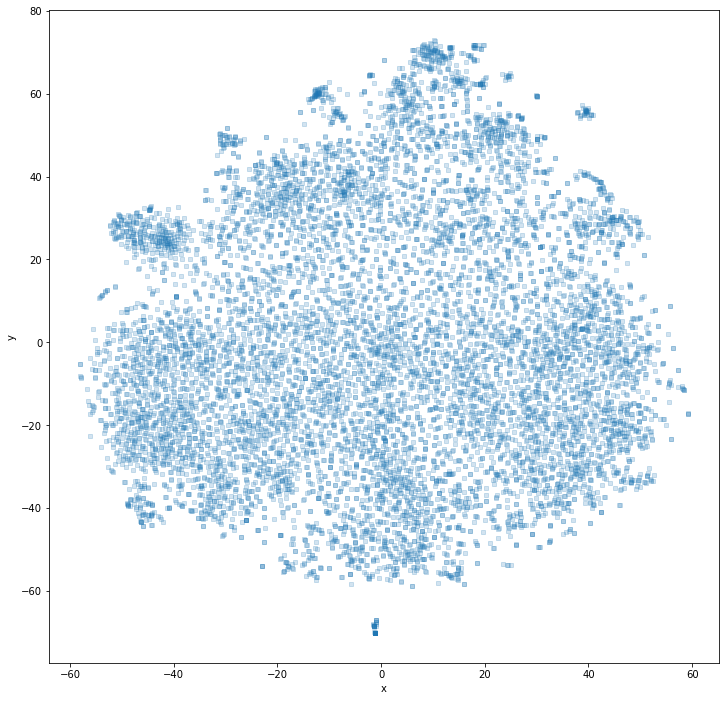

In [113]:
_ = coords_df.plot.scatter('x','y', figsize=(12,12), marker=',', s=10, alpha=0.2)

In [114]:
output_notebook()

Loading BokehJS ...

In [115]:
subset_df = coords_df.sample(n=500)

In [116]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

In [117]:
# output_file() to save, here

TypeError: output_file() missing 1 required positional argument: 'filename'